# k-최근접 이웃회귀

KNN을 활용할하기기 꺼려지는는 상황

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Fish.csv'
df = pd.read_csv(path)
perch_df = df[df['Species'] == 'Perch']
perch_df

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
79,Perch,80.0,17.2,19.0,20.2,5.6358,3.0502
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720


In [ ]:
length = perch_df['Length2']
weight = perch_df['Weight']
perch_length = length.to_numpy()
perch_weigth = weight.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weigth)

In [ ]:
train_input.shape

(42,)

In [ ]:
train_input = train_input.reshape(-1,1) # 독립립 변수수 목록은은 2차원원 배열열 구조로 변경
test_input = test_input.reshape(-1,1)
train_input.shape

(42, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=3) # 모델 생성
kn.fit(train_input,train_target) #학습
pval = kn.predict([[50]]) # 예측해
print("예측 값 :", pval)

예측 값 : [1000.]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(kn.kneighbors([[50]]))

(array([[6. , 6.5, 7. ]]), array([[ 1, 28, 15]]))


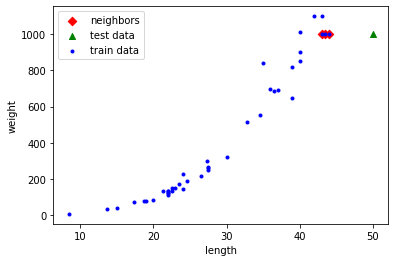

In [ ]:
distances, indexes = kn.kneighbors([[50]])
plt.scatter(train_input[indexes],train_target[indexes],label='neighbors', marker='D',color='r')
plt.scatter(50,1000,label='test data', marker='^',color='g')
plt.scatter(train_input,train_target,label = 'train data',color='b',marker='.')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [ ]:
pval = kn.predict([[100]]) # 예측해
print("예측 값 :", pval)

예측 값 : [1000.]


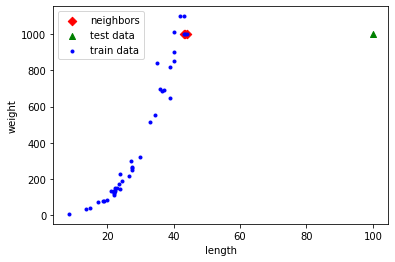

In [ ]:
distances, indexes = kn.kneighbors([[100]])
plt.scatter(train_input[indexes],train_target[indexes],label= 'neighbors', marker='D',color='r')
plt.scatter(100,1000,label='test data', marker='^',color='g')
plt.scatter(train_input,train_target,label = 'train data',color='b',marker='.')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

# 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # 모델 생성
lr.fit(train_input,train_target) #공부해
p_val = lr.predict([[50],[100]])
print(p_val)

[1205.63419214 3054.53162054]


In [ ]:
p_val2 = kn.predict([[50],[100]])
print(p_val2)

[1000. 1000.]


In [ ]:
print("가중치(기울기):", lr.coef_,"편향:",lr.intercept_)

가중치(기울기): [36.97794857] 편향: -643.2632362552656


In [ ]:
print(50*lr.coef_+lr.intercept_)
print(p_val[0])

[1205.63419214]
1205.6341921437152


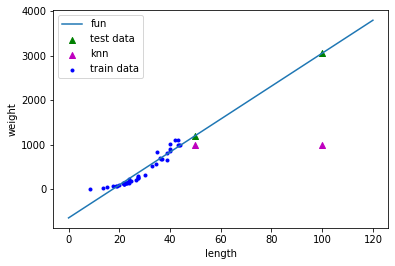

In [ ]:
plt.scatter([50,100],p_val,label='test data', marker='^',color='g')
plt.scatter([50,100],[1000,1000],label='knn', marker='^',color='m')
plt.scatter(train_input,train_target,label = 'train data',color='b',marker='.')
plt.plot([0,120],[0*lr.coef_+lr.intercept_, 120*lr.coef_+lr.intercept_],label='fun')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

w = l * w + b

무게 길이 가중치 편향

y = wx + b(단항회귀)

y = w_1x_1 + w_2x_2+ ...+b (다항회귀)


가상의 데이터를 만들어서 선형회귀를 해보자

y = 2x+3에 가까운 데이터

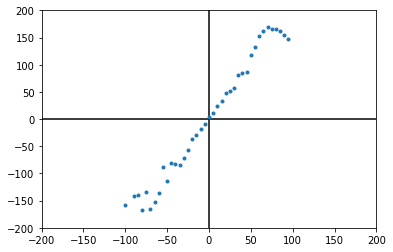

In [ ]:
import numpy as np
input = [x for x in range(-100,100,5)]
target = [(2+np.random.uniform(-0.5,0.5))*x+(3+np.random.randint(-3,3)) for x in input]
plt.plot(input[:],target,'.')
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.vlines(0,-200,200)
plt.hlines(0,-200,200)
plt.show()

In [ ]:
input_data = np.array(input).reshape(-1,1)
input_data.shape

(40, 1)

In [ ]:
target_data = np.array(target)

In [ ]:
target_data

array([-158.5941707 , -223.16949037, -142.07359259, -139.8449559 ,
       -166.62700125, -134.00611084, -165.23850041, -153.00062224,
       -135.77710121,  -87.57736265, -114.51766079,  -81.47343093,
        -82.83383915,  -84.71018089,  -71.87606387,  -55.96455561,
        -36.15688268,  -29.05555832,  -17.70984811,   -9.40710818,
          3.        ,   11.65714414,   23.56541757,   33.50107075,
         48.87977829,   51.03173116,   56.91211958,   81.32379763,
         84.43652351,   86.53693403,  116.9676955 ,  133.04848582,
        152.78861277,  161.9016616 ,  170.15620484,  164.9915647 ,
        166.30350404,  162.64247632,  154.62123874,  147.93604139])

In [ ]:
lr = LinearRegression()
lr.fit(input_data,target_data)
print(f"편향 :{lr.coef_[0]:.2f} 기울기:{lr.intercept_:.2f}")

편향 :2.00 기울기:3.08


In [ ]:
print(type(lr.coef_))
print(type(lr.intercept_))

<class 'numpy.ndarray'>
<class 'numpy.float64'>


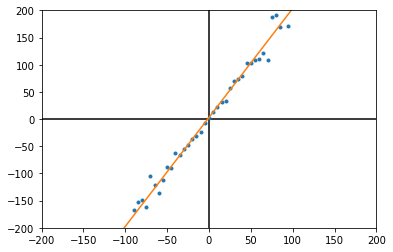

In [ ]:
input = [x for x in range(-100,100,5)]
target = [(2+np.random.uniform(-0.5,0.5))*x+(3+np.random.randint(-3,3)) for x in input]
plt.plot(input[:],target,'.')
plt.plot([-200,200],[-200*lr.coef_+lr.intercept_,200*lr.coef_+lr.intercept_])
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.vlines(0,-200,200)
plt.hlines(0,-200,200)
plt.show()

y = 2xx+3x+5

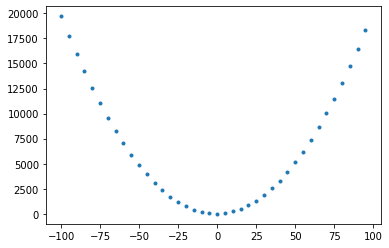

In [ ]:
x = [np.random.randint(-200,200) for _ in range(50)]

#target = [(2+np.random.uniform(-0.5,0.5))*x+(3+np.random.randint(-3,3)) for x in input]
target = [2*x*x + 3*x +5 +np.random.randint(-10,10) for x in input]
plt.plot(input,target,'.')
# plt.xlim(-200,200)
# plt.ylim(-200,200)
# plt.vlines(0,-200,0000)
#plt.hlines(0,-200,200)
plt.show()

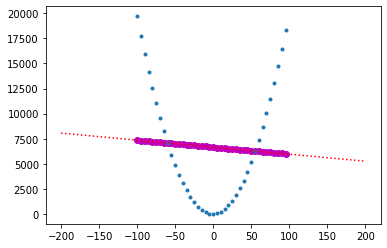

In [ ]:
input_arr = np.array(input).reshape(-1,1)
lr = LinearRegression()
lr.fit(input_arr,target)
x = [np.random.randint(-200,200) for _ in range(50)]

p_val = lr.predict(input_arr)
target = [2*x*x + 3*x +5 +np.random.randint(-10,10) for x in input]
plt.plot(input,target,'.')
plt.plot([-200,200],[-200*lr.coef_+lr.intercept_,200*lr.coef_+lr.intercept_],'r:')
plt.scatter(input,p_val,color='m')

plt.show()

In [ ]:
input_2_arr=np.array(input_arr).reshape(-1,1)
input_total = [[x,x*x] for x in input]

In [ ]:
print(np.array(input_total).shape)
# print(input_total.shape)
print(len(target))

(40, 2)
40


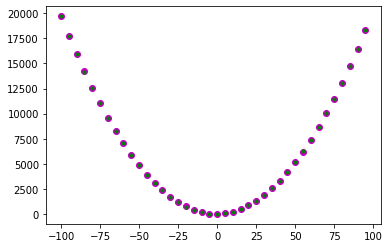

In [ ]:
lr = LinearRegression()
lr.fit(input_total,target)
p_val2 = lr.predict(input_total)
plt.plot(input,target,'.',color='g')
plt.scatter(input,p_val2,color='m')
plt.show()

In [ ]:
print(type(train_input))

<class 'numpy.ndarray'>


In [ ]:
print(train_input.shape)

(42, 3)


In [ ]:
lr = LinearRegression()
lr.fit(train_input,train_target)
p_val = lr.predict([[2],[10],[50],[100]])
print("예측 : ",p_val)

ValueError: ignored

## 다항 회귀

In [ ]:
perch_length = perch_df['Length2'].to_numpy()
perch_weigth = perch_df['Weight'].to_numpy()
pl2 = [[x,x*x] for x in perch_length]
lr = LinearRegression()
lr.fit(pl2,perch_weigth)

LinearRegression()

In [ ]:
test2 = [[x,x*x] for x in range(0,100)]
p_val2 = lr.predict(test2)

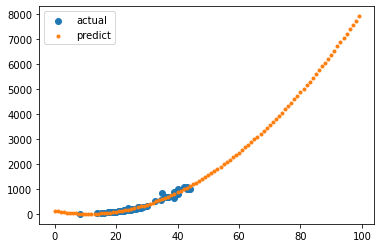

In [ ]:
plt.scatter(perch_length,perch_weigth,label='actual')
plt.scatter(range(0,100),p_val2,label='predict',marker='.')
plt.legend()
plt.show()

weigth = -22.41 * length + 1.02* length*length + 131.6452

In [ ]:
print(lr.coef_,lr.intercept_)

[-6.99868668] 6653.203283302064


#특성성 공학과 규제

## 사이킷런의 변환기
y = w1*x1*x1 + w2*x1*x2 + w3*x1+w4*x2*x2 + w5*x2 + b

[x1,x2,x1*x2, x1 * x1, x2*x2]


In [ ]:
perch_full =perch_df[['Length2','Height','Width']].to_numpy()
print(perch_full)

[[ 8.4     2.112   1.408 ]
 [13.7     3.528   1.9992]
 [15.      3.824   2.432 ]
 [16.2     4.5924  2.6316]
 [17.4     4.588   2.9415]
 [18.      5.2224  3.3216]
 [18.7     5.1992  3.1234]
 [19.      5.6358  3.0502]
 [19.6     5.1376  3.0368]
 [20.      5.082   2.772 ]
 [21.      5.6925  3.555 ]
 [21.      5.9175  3.3075]
 [21.      5.6925  3.6675]
 [21.3     6.384   3.534 ]
 [22.      6.11    3.4075]
 [22.      5.64    3.525 ]
 [22.      6.11    3.525 ]
 [22.      5.875   3.525 ]
 [22.      5.5225  3.995 ]
 [22.5     5.856   3.624 ]
 [22.5     6.792   3.624 ]
 [22.7     5.9532  3.63  ]
 [23.      5.2185  3.626 ]
 [23.5     6.275   3.725 ]
 [24.      7.293   3.723 ]
 [24.      6.375   3.825 ]
 [24.6     6.7334  4.1658]
 [25.      6.4395  3.6835]
 [25.6     6.561   4.239 ]
 [26.5     7.168   4.144 ]
 [27.3     8.323   5.1373]
 [27.5     7.1672  4.335 ]
 [27.5     7.0516  4.335 ]
 [27.5     7.2828  4.5662]
 [28.      7.8204  4.2042]
 [28.7     7.5852  4.6354]
 [30.      7.6156  4.7716]
 

In [ ]:
perch_weigth

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [ ]:
train_input,test_input,train_target,test_target = train_test_split(perch_full,perch_weigth)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
print(poly.fit_transform([[2,3]]))
# [1,x1,x2,x1*x1,x1*x2,x2*x2]

[[1. 2. 3. 4. 6. 9.]]
[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(degree=3)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
# [1,x1,x2,x1*x1,x1*x2,x2*x2, x1*x1*x1,x1*x1*x2,x1*x2*x2,x2*x2*x2 ]

[[ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
#[x1,x2,x1*x1,x1*x2,x2*x2]

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(degree=3,include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
# [x1,x2,x1*x1,x1*x2,x2*x2, x1*x1*x1,x1*x1*x2,x1*x2*x2,x2*x2*x2 ]

[[ 2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [ ]:
print(poly.get_feature_names())

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(train_input.shape)

(42, 3)


In [ ]:
poly = PolynomialFeatures(include_bias =False)

In [ ]:
poly.fit([[1,2,3]])
train_poly=poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 9)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9937832279830631
0.9611684974457295


In [ ]:
poly5 = PolynomialFeatures(include_bias =False,degree=5)
poly5.fit([[1,2,3]])
train_poly5=poly5.transform(train_input)
test_poly5 = poly5.transform(test_input)
print(train_poly5.shape)

(42, 55)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly5,train_target)
print(lr.score(train_poly5,train_target))
print(lr.score(test_poly5,test_target))

0.9999999999999285
-2376.2530502462505


언더핏 굿핏 오버핏

언더핏에서 굿핏갈때 : 학습데이터증가, 학습양 증가, 특성수를 증가


스케일 조정방법 : 

min max scaler

stander scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit([[1,2],[1,2],[2,3],[3,4],[3,1]])
print(ss.transform([[1,2],[1,2],[2,3],[3,4],[3,1]]))

#train_scaled = ss.transform(train_poly)
#test_scaled = ss.transform(test_poly)

[[-1.11803399 -0.39223227]
 [-1.11803399 -0.39223227]
 [ 0.          0.58834841]
 [ 1.11803399  1.56892908]
 [ 1.11803399 -1.37281295]]


In [ ]:
a = np.array([1,1,2,3,3])
print(a.mean(),a.std())

2.0 0.8944271909999159


In [ ]:
print((a-2.0/0.89))

[-1.24719101 -1.24719101 -0.24719101  0.75280899  0.75280899]


In [ ]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
lr = LinearRegression()
lr.fit(train_scaled,train_target)
print(lr.coef_)

[  -37.30935822   132.46431534  -333.4220277   1017.3579942
 -2964.94889647  1236.12757302  1659.43737937  -270.53547262
  -101.18636748]


y = 1.2x1 -160x2 -38x3 +970x1*x1 -2600x1x2 + 716x1x3 + 2093x2*x2 - 738x2*x3 + 83x3*x3

## 릿지와 라쏘 차이 
릿지는 계수를 제곱한 값을 기준으로 규제

라쏘는 계수의 절댓값을 기준으로 규제

일반적으로 릿지를 선호, 라쏘는 계수의 크기를 0으로 만들수잇음

## 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.coef_)

[-28.15797719 -37.19639207 -27.17365532  71.36295978  67.15903263
  75.78479294  63.58909271  71.19331204  76.76701513]


In [ ]:
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9900979890874545
0.9733290322532152


## 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.coef_)

[-30.87063037 -24.6951465  -61.38499202  49.60761674 100.93317906
 119.55435799   0.         103.29676799  76.95312778]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.934e+02, tolerance: 4.768e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9911347178678193
0.9704674397833427


## 하이퍼 파라미터 값을 그라디언트하게 전달하면서 적절한 값을 찾아라

In [ ]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))
print(train_score, test_score)

[0.9933970877363184, 0.9931674493708741, 0.9927467286497654, 0.9900979890874545, 0.9781647380077239, 0.9300921925506602] [0.9634622092999225, 0.9662857542767261, 0.9704623245373128, 0.9733290322532152, 0.9713292763307427, 0.9281106854199004]


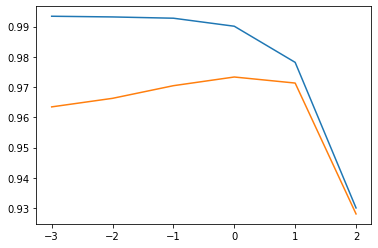

In [ ]:
plt.plot(np.log10(alpha_list),train_score,label='train score')
plt.plot(np.log10(alpha_list),test_score,label='test score')
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9927467286497654
0.9704623245373128


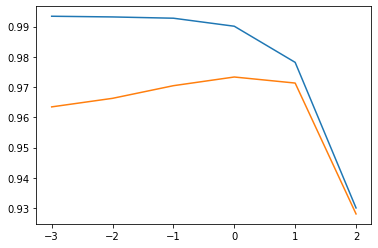

In [ ]:
plt.plot(np.log10(alpha_list),train_score,label='train score')
plt.plot(np.log10(alpha_list),test_score,label='test score')
plt.show()

In [ ]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha,max_iter=1000000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))
print(train_score, test_score)

[0.9937734434857655, 0.9933766771506926, 0.9931226655308973, 0.9912987411441608, 0.9838225619332032, 0.8962272443564296] [0.9614209804362267, 0.9634969467362857, 0.9647405249349263, 0.9681839284401869, 0.9684751312067448, 0.8790584437779148]


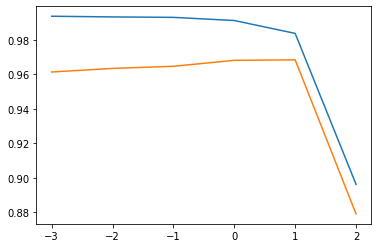

In [ ]:
plt.plot(np.log10(alpha_list),train_score,label='train score')
plt.plot(np.log10(alpha_list),test_score,label='test score')
plt.show()

In [ ]:
lasso = Lasso(alpha=1, max_iter=1000000)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9912987411441608
0.9681839284401869


# 경사하강법

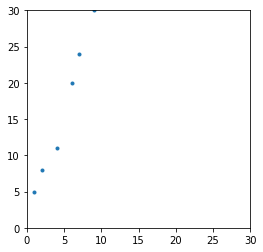

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
ex = [2,4,7,1,9,6]
ex_ys = [8,11,24,5,30,20]
ex_xs = [[x] for x in ex] # 독립변수 형태로 변환
plt.figure(figsize=(4,4))
plt.plot(ex,ex_ys,'.')
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

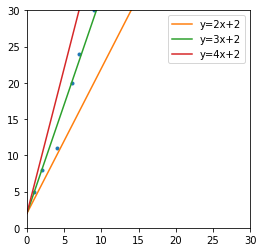

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(ex,ex_ys,'.')
plt.plot([0,30],[2*0+2,30*2+2],label='y=2x+2')
plt.plot([0,30],[3*0+2,30*3+2],label='y=3x+2')
plt.plot([0,30],[4*0+2,30*4+2],label='y=4x+2')
plt.legend()
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

mse = y-yp

    = y - w_px + b_p



In [ ]:
def mae(yp,y):
  return np.mean(np.abs(yp-y))
def mse(yp,y):
  return np.mean(sum(yp-y)**2)

In [ ]:
yp=np.array([1,2,9])
ya=np.array([2,3,4])
print(mae(yp,ya),mse(yp,ya))

2.3333333333333335 9.0


In [ ]:
ex_arr = np.array(ex)
ey_arr = np.array(ex_ys)
mses = []
for w in np.arange(-2,5,0.1):
  yp = w*ex_arr+2
  mses.append(mse(yp,ey_arr))
print(mses)
print(np.argmin(mses))
#print(len(mses))
print(mses[50])
# yp1 = 2*ex_arr + 2
# mses.append(mse(yp1,ey_arr))
# yp2 = 3*ex_arr +2
# mses.append(mse(yp2,ey_arr))
# yp3 = 4*ex_arr +2
# mses.append(mse(yp3,ey_arr))
# print(mses)

[20736.0, 19909.21, 19099.239999999998, 18306.089999999997, 17529.760000000002, 16770.25, 16027.559999999998, 15301.689999999993, 14592.639999999996, 13900.409999999994, 13224.999999999993, 12566.409999999996, 11924.639999999994, 11299.68999999999, 10691.559999999996, 10100.249999999995, 9525.759999999991, 8968.089999999993, 8427.239999999993, 7903.209999999994, 7395.99999999999, 6905.609999999992, 6432.039999999992, 5975.289999999991, 5535.359999999992, 5112.249999999992, 4705.959999999992, 4316.489999999991, 3943.8399999999906, 3588.0099999999907, 3248.999999999991, 2926.8099999999918, 2621.4399999999914, 2332.889999999992, 2061.159999999992, 1806.2499999999927, 1568.1599999999928, 1346.8899999999928, 1142.4399999999935, 954.8099999999938, 783.9999999999942, 630.0099999999952, 492.8399999999951, 372.48999999999523, 268.9599999999962, 182.24999999999721, 112.35999999999754, 59.28999999999794, 23.039999999998813, 3.6099999999995696, 1.0000000000002611, 15.210000000001125, 46.2400000000

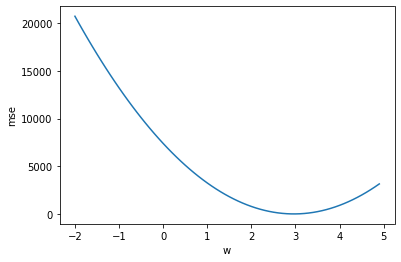

In [ ]:
plt.plot(np.arange(-2,5,0.1),mses)
plt.xlabel('w')
plt.ylabel('mse')
plt.show()

In [ ]:
def gradient(ys,xs,w,b):
  yp = w*xs + b
  error = ys-yp
  wd = -(2/len(xs))*sum(xs*error)
  bd = -(2/len(xs))*sum(error)
  return wd,bd

In [ ]:
def gradient_descent(xs,ys,lr=0.001,epochs=1000):
  wphl = [] #학습 과정에서의 가중치와 편향을 보관
  wp = np.random.uniform(-1,1) # 초기 가중치를 랜덤하게 설정
  bp = np.random.uniform(-1,1) # 초기 편향을 랜덤하게 설정
  for epoch in range(epochs) : # epoch == 학습할 수
    wd,bd = gradient(ys,xs,wp,bp)#가중치와 편향의 기울기를 계산
    wp = wp-(wd*lr)
    bp = bp -(bd*lr)
    wphl.append([wp,bp])
  return wp,bp,wphl #가중치 ,편향, 히스토리 반환

In [ ]:
wp,bp,wphl = gradient_descent(ex_arr,ey_arr)
for epoch, (wb,bd) in enumerate(wphl) : 
  print(f"epoch:{epoch:04d} w:{wb:10.2f} b:{bd:10.2f}")

In [ ]:
min_val = min(min(ex_arr),min(ey_arr))
max_val = max(max(ex_arr),max(ey_arr))

for epoch, (wb,bd) in enumerate(wphl):
  plt.figure(figsize =(4,4))
  plt.plot(ex_arr,ey_arr,'.',label='actual')
  sx = min_val
  sy = wb * sx +bd 
  ex = max_val
  ey = wb*ex + bd
  plt.plot([sx,ex],[sy,ey],label=f'epoch:{epoch} y = {wb:.2f}x+{bd:.2f}')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()
  if epoch == 200:
    break